In [1]:
import itertools
import numpy as np
import pandas as pd
import ds_charts as ds
from datetime import datetime
import matplotlib.pyplot as plt
from seaborn import distplot,heatmap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters


In [2]:
#register_matplotlib_converters()
#Definição variáveis iniciais
file = 'data.csv'
tc = 'surgycal margin'
data = pd.read_csv(file,index_col=tc,na_values='')
df = pd.DataFrame(data)
data.shape
data.dtypes

Age.at.MRI                                     float64
Prostate.volume                                  int64
PSA.value.at.MRI                               float64
Index.lesion.PIRADS.V2                           int64
Index.lesion.size                                int64
Capsular.contact.lenght_TLC                      int64
Smooth.capsular.bulging                          int64
Capsular.disruption                              int64
Unsharp.margin                                   int64
Irregular.contour                                int64
Black.estrition.periprostatic.fat                int64
Retoprostatic.angle.obliteration                 int64
Measurable.ECE                                   int64
ECE.in.prostatectomy.specimen_gold.standard      int64
Gleason.score                                    int64
regra                                          float64
dtype: object

In [3]:
#Tipos de variável
def get_variable_types(df):
    NR_SYMBOLS = 10
    variable_types = {'binary': [], 'numeric': [], 'date': [], 'symbolic': []}
    for c in df.columns:
        mv = df[c].isna().sum()
        uniques = df[c].unique()
        if mv == 0:
            if len(uniques) == 2:
                variable_types['binary'].append(c)
                df[c].astype('bool')
            elif df[c].dtype == 'datetime64':
                variable_types['date'].append(c)
            elif len(uniques) < NR_SYMBOLS:
                df[c].astype('category')
                variable_types['symbolic'].append(c)
            else:
                variable_types['numeric'].append(c)
        else:
            uniques = [v for v in uniques if not np.isnan(v)]
            values = [v for v in uniques if isinstance(v,str)]
            if len(uniques) == 2:
                variable_types['binary'].append(c)
            elif len(values) == len(uniques):
                df[c].astype('category')
                variable_types['symbolic'].append(c)
            else:
                values = [v for v in uniques if isinstance(v, datetime)]
                if len(values) == len(uniques):
                    variable_types['date'].append(c)
                else:
                    variable_types['numeric'].append(c)
    return variable_types

{'binary': ['Smooth.capsular.bulging', 'Capsular.disruption', 'Unsharp.margin', 'Irregular.contour', 'Black.estrition.periprostatic.fat', 'Retoprostatic.angle.obliteration', 'Measurable.ECE', 'ECE.in.prostatectomy.specimen_gold.standard', 'Gleason.score', 'regra'], 'numeric': ['Age.at.MRI', 'Prostate.volume', 'PSA.value.at.MRI', 'Index.lesion.size', 'Capsular.contact.lenght_TLC'], 'date': [], 'symbolic': ['Index.lesion.PIRADS.V2']}


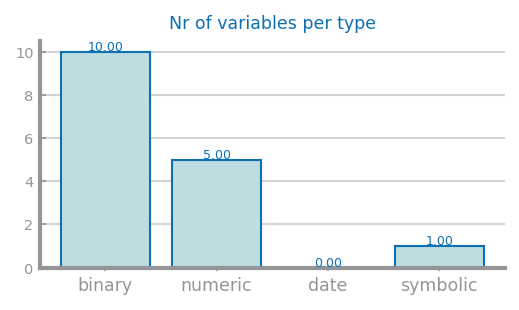

In [4]:
#Cálculo das variáveis
variable_types = get_variable_types(data)
print(variable_types)
counts = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])
plt.figure(figsize=(4,2))
ds.bar_chart(list(counts.keys()), list(counts.values()), title='Nr of variables per type')
#plt.savefig('Images/variable_types.png')
plt.show()

#Tipos das variáveis
binary_vars = variable_types['binary']
numeric_vars = variable_types['numeric']
symbolic_vars = variable_types['symbolic']

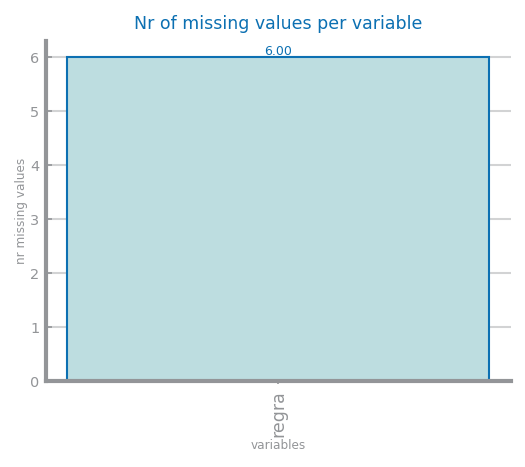

In [5]:
#Cálculo dos missing values
mv = {}
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr
plt.figure()
ds.bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable',xlabel='variables', ylabel='nr missing values', rotation=True)
#plt.savefig('images/mv.png')
plt.show()